# NAIVE BAYES WORKFLOW (UNESCO DATASET)
Status: **DONE**

In [1]:
import sys
import os
import pandas as pd
import importlib
import joblib
from sklearn.naive_bayes import MultinomialNB
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../..")))

from classical_models.uci_classical import train_text_model
from shared.metrics import compute_classic_metrics, plot_confusion_matrix, save_evaluation_report

importlib.reload(sys.modules['classical_models.uci_classical'])
importlib.reload(sys.modules['shared.metrics'])

<module 'shared.metrics' from 'c:\\Users\\mosqu\\personal-projects\\dss_pit\\src\\shared\\metrics.py'>

In [2]:
df = pd.read_csv("../../../data/uci/cleaned_covid_lies.csv")

X = df['misconception']
y = df['label']

df.head()

,misconception,label
0,coronavirus genetically engineered,na
1,blowing conch shell destroys coronavirus potency,na
2,swan dolphin swimming venice canal following c...,na
3,cocaine cure coronavirus,na
4,observing janata curfew result reduction covid...,na


In [3]:
naive_bayes = MultinomialNB()

results = train_text_model(naive_bayes, X_text=X, y=y, max_features=5000, ngram_range=(1,2), oversample_method="random")

[INFO] Final label distribution:
label
na     6149
pos     288
neg     154
Name: count, dtype: int64
[INFO] Oversampling method selected: random
  Before oversampling: {'na': 4919, 'pos': 230, 'neg': 123}
  After oversampling: {'na': 4919, 'neg': 4919, 'pos': 4919}


In [4]:
y_test = results['y_test']
y_pred = results['y_pred']

metrics = compute_classic_metrics(y_test, y_pred)
print("Accuracy:", metrics["accuracy"])
print("F1 Score:", metrics["f1_score"])
print(metrics["report"])

Accuracy: 0.7081122062168309
F1 Score: 0.7861106512655557
              precision    recall  f1-score   support

          na       0.99      0.71      0.83      1230
         neg       0.11      0.68      0.19        31
         pos       0.17      0.74      0.28        58

    accuracy                           0.71      1319
   macro avg       0.42      0.71      0.43      1319
weighted avg       0.93      0.71      0.79      1319



<Figure size 800x600 with 0 Axes>

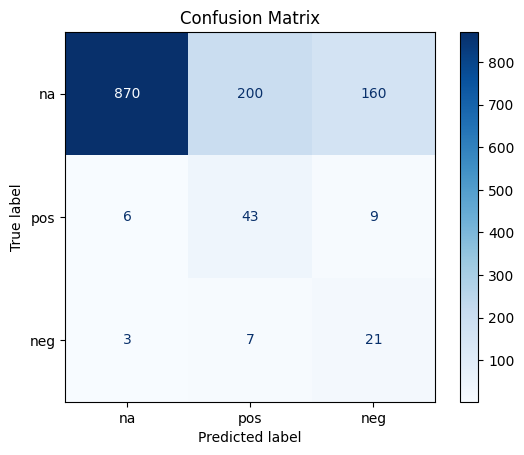

In [5]:
plot_confusion_matrix(y_test, y_pred, labels=y_test.unique())

In [6]:
save_evaluation_report(metrics, "../../../classical_models/uci_results/naive_bayes_evaluation_report.json")

Evaluation report saved to ../../../classical_models/uci_results/naive_bayes_evaluation_report.json


In [7]:
joblib.dump(results["model"], "../../../shared/models/naive_bayes_uci_model.pkl")
joblib.dump(results["vectorizer"], "../../../shared/vectorizers/naive_bayes_uci_vectorizer.pkl")

['../../../shared/vectorizers/naive_bayes_uci_vectorizer.pkl']